In [2]:
class LinearRegression:
    """Linear regression model using gradient descent."""

    def __init__(self, lr=0.001, epochs=1000):
        """Initialise the model.

        Args:
            lr (float, optional): Learning rate of the model.
                Defaults to 0.001.
            epochs (int, optional): Number of steps.
                Defaults to 1000.
        """
        self.learning_rate = lr
        self.epochs = epochs
        self.w = 0  # theta1
        self.b = 0  # theta0
        self.iterations = 0
        self.global_loss = 0

    def predict(self, input):
        """Predict the output.

        Args:
            input (int, float): Input value.

        Returns:
            float: Predicted output.
        """
        return self.w * input + self.b

    def calculate_loss(self):
        """Calculate the loss. (Mean Squared Error)

        Returns:
            float: return the loss.
        """
        global_loss = 0
        for i in range(0, self.data_len):
            predictions = self.predict(self.X[i])
            loss_i = (predictions - float(self.y[i])) ** 2
            global_loss += loss_i
        return (1 / (2 * self.data_len)) * global_loss

    def gradient_descent(self):
        """Gradient descent algorithm to update the weights and bias."""
        dw = float(0)
        db = float(0)

        for i in range(0, self.data_len):
            predictions = self.predict(self.X[i])
            db += predictions - self.y[i]
            dw += (predictions - self.y[i]) * self.X[i]

        tw = self.w - (self.learning_rate *
                       ((1 / self.data_len) * dw))
        tb = self.b - (self.learning_rate *
                       ((1 / self.data_len) * db))
        self.w = tw
        self.b = tb

    def train(self, X, y, print_every=100):
        """Train the model.

        Args:
            X (list): Car mileage.
            y (list): Car price.
            print_every (int, optional): Print the loss every n epochs.
                Defaults to 100.
        """
        self.X = X
        self.y = y
        self.data_len = len(X)

        for epoch in range(self.epochs):
            loss = self.calculate_loss()

            if not epoch % print_every:
                print(f'epoch: {epoch}, ' +
                      f'loss: {loss:.3f}',
                      f'w: {self.w:.3f}',
                      f'b: {self.b:.3f}')

            self.gradient_descent()
            self.iterations += 1
        print("weight =", self.w, "b =", self.b)

    def get_params(self):
        """Return the weights and bias.

        Returns:
            float: weights and bias.
        """
        return self.w, self.b

    def precision(self, X, y):
        """Calculate the precision of the model.

        Args:
            X (list): Car mileage.
            y (list): Car price.

        Returns:
            float: Precision of the model.
        """
        global_loss = 0
        for i in range(0, len(X)):
            predictions = self.predict(X[i])
            loss_i = (predictions - float(y[i])) ** 2
            global_loss += loss_i
        return (1 / (2 * len(X))) * global_loss


In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from ft_linear_regression import LinearRegression


def prepare_data(path):
    """Read the data from a csv file and
    return the values of the columns 'km' and 'price'.

    Args:
        path (str): path to the csv file.

    Returns:
        lists: values of the columns 'km' and 'price'.
    """
    try:
        data = pd.read_csv(path)
        X = data['km'].values
        y = data['price'].values
    except FileNotFoundError:
        print("File not found")
        exit(1)
    return X, y


def normalisation(s):
    """Normalise the data.

    Args:
        s (list): list of values to normalise.

    Returns:
        list: list of normalised values.
    """
    return [((x - min(s)) / (max(s) - min(s))) for x in s]


def save_params(X, y, w, b):
    """Scale back the parameters and save them in a json file.

    Args:
        X (list): Car mileage.
        y (list): Car price.
        w (float): weight.
        b (float): bias.
    """
    deltaX = max(X) - min(X)
    deltaY = max(y) - min(y)
    t0 = ((deltaY * b) + min(y) - w * (deltaY / deltaX) * min(X))
    t1 = deltaY * w / deltaX
    print(f"theta0 = {t0}, theta1 = {t1}")

    with open('params.json', 'w') as f:
        json.dump({'theta0': t0, 'theta1': t1}, f)


def plot_result(nX, ny, w, b):
    plt.yscale('linear')
    plt.scatter(nX, ny, color='red')
    plt.axline((0, b), slope=w)
    plt.show()


if __name__ == "__main__":
    X, y = prepare_data("data.csv")
    nX = normalisation(X)
    ny = normalisation(y)
    ln = LinearRegression(lr=0.01, epochs=5000)
    ln.train(nX, ny)
    w, b = ln.get_params()
    save_params(X, y, w, b)


epoch: 0, loss: 0.206 w: 0.000 b: 0.000
epoch: 100, loss: 0.062 w: 0.069 b: 0.355
epoch: 200, loss: 0.045 w: 0.054 b: 0.482
epoch: 300, loss: 0.040 w: 0.015 b: 0.535
epoch: 400, loss: 0.037 w: -0.031 b: 0.565
epoch: 500, loss: 0.035 w: -0.077 b: 0.586
epoch: 600, loss: 0.032 w: -0.121 b: 0.604
epoch: 700, loss: 0.030 w: -0.164 b: 0.621
epoch: 800, loss: 0.028 w: -0.205 b: 0.637
epoch: 900, loss: 0.027 w: -0.243 b: 0.651
epoch: 1000, loss: 0.025 w: -0.280 b: 0.665
epoch: 1100, loss: 0.024 w: -0.315 b: 0.678
epoch: 1200, loss: 0.023 w: -0.348 b: 0.691
epoch: 1300, loss: 0.021 w: -0.380 b: 0.703
epoch: 1400, loss: 0.020 w: -0.410 b: 0.715
epoch: 1500, loss: 0.019 w: -0.439 b: 0.725
epoch: 1600, loss: 0.019 w: -0.466 b: 0.736
epoch: 1700, loss: 0.018 w: -0.492 b: 0.746
epoch: 1800, loss: 0.017 w: -0.517 b: 0.755
epoch: 1900, loss: 0.016 w: -0.541 b: 0.764
epoch: 2000, loss: 0.016 w: -0.563 b: 0.772
epoch: 2100, loss: 0.015 w: -0.585 b: 0.781
epoch: 2200, loss: 0.015 w: -0.605 b: 0.788
epoc

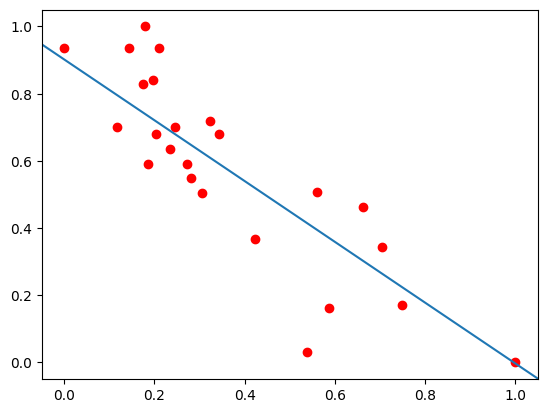

In [13]:
plot_result(nX, ny, w, b)